In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Download the dataset here:

https://data.opendatasoft.com/explore/dataset/us-vehicle-fuel-economy-data-1984-2017%40kapsarc/table/?disjunctive.make&disjunctive.model&sort=-year

In [2]:
df = pd.read_csv('./data/us-vehicle-fuel.csv', delimiter=';')
df

,Year,Manufacturer,Model,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,2017,MINI,John Cooper Works Convertible,11.900400,0,0,0,22,22,0,...,BMX,NaN,0,NaN,2016-04-04,2016-09-16,Y,0,0,0
1,2017,BMW,640i Coupe,12.396250,0,0,0,21,20,0,...,BMX,NaN,0,NaN,2016-04-04,2016-09-09,Y,0,0,0
2,2017,BMW,640i xDrive Convertible,13.523182,0,0,0,19,19,0,...,BMX,NaN,0,NaN,2016-04-04,2016-09-09,Y,0,0,0
3,1987,GMC,R15 Pickup 2WD,21.250714,0,0,0,13,0,0,...,NaN,NaN,0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
4,2017,BMW,M6 Coupe,17.500588,0,0,0,15,14,0,...,BMX,NaN,0,NaN,2016-04-04,2016-09-09,Y,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46187,2016,Volkswagen,Passat,10.258966,0,0,0,25,24,0,...,VGA,NaN,0,NaN,2015-09-25,2016-09-26,N,0,0,0
46188,1987,Dodge,D100/D150 Pickup 2WD,22.885385,0,0,0,11,0,0,...,NaN,NaN,0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
46189,2016,Dodge,Charger SRT8,18.594375,0,0,0,13,13,0,...,CRX,NaN,0,NaN,2015-09-25,2016-09-26,N,0,0,0
46190,2016,Ford,Focus FWD,9.597097,0,0,0,27,26,0,...,FMX,NaN,0,NaN,2015-10-02,2017-04-05,N,0,0,0


In [3]:
df = df.replace({'fuelType': {'Midgrade': 'other',
                              'Premium and Electricity': 'Hybrid',
                              'Regular Gas and Electricity': 'Hybrid',
                              'Regular Gas or Electricity': 'Hybrid',
                              'Premium Gas or Electricity': 'Hybrid',
                              'Gasoline or natural gas': 'other',
                              'Gasoline or propane': 'other',
                             }})

In [4]:
df = df.query("fuelType != 'other'")
df = df.query("Year <= 2022")

In [5]:
df['fuelType'].value_counts()

Regular            27935
Premium            13238
Gasoline or E85     1371
Diesel              1232
Electricity          381
Hybrid               276
Premium or E85       127
CNG                   60
Name: fuelType, dtype: int64

**Questions**

- What kind of vehicle fuels are there over time?

- Gasoline consumption / electricity consumption over time?

- What is the favorite vehicle fuel per car manufacturer?



In [6]:
fuel_types = df.groupby(['Year', 'fuelType'])['fuelType'].count()
fuel_types

Year  fuelType       
1984  Diesel              262
      Regular            1702
1985  Diesel              158
      Premium             101
      Regular            1442
                         ... 
2022  Electricity          89
      Gasoline or E85      17
      Hybrid               44
      Premium             592
      Regular             530
Name: fuelType, Length: 208, dtype: int64

In [7]:
fuel_types = fuel_types.reset_index(level=0).rename(columns={'fuelType':'count'}).reset_index()

In [8]:
sns.set_style('whitegrid')
sns.set_context('notebook')

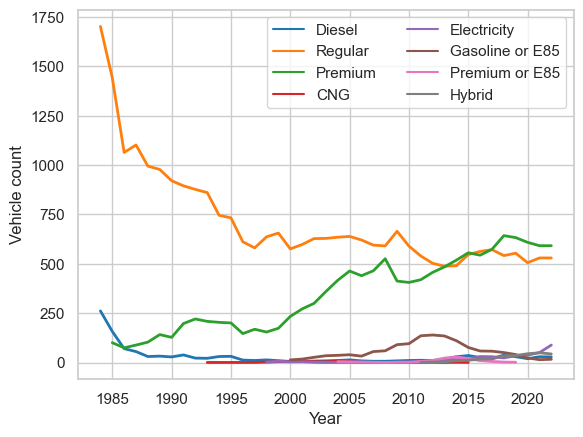

In [9]:
fig, ax = plt.subplots()
sns.lineplot(data=fuel_types, x='Year', y='count', hue='fuelType', lw=2, ax=ax)

ax.legend(loc=1, ncol=2)

ax.set_ylabel('Vehicle count')

plt.savefig('./plots/2023-09-08_fuel_type_year.png', dpi=150, bbox_inches='tight')
plt.show()

### Market share

In [10]:
model_count = fuel_types.groupby('Year')['count'].sum().reset_index()

model_count.head()

,Year,count
0,1984,1964
1,1985,1701
2,1986,1210
3,1987,1247
4,1988,1130


In [11]:
newcol = []
for i in range(len(fuel_types)):
    y = fuel_types.iloc[i]['Year']
    c = model_count[model_count['Year']==y]['count'].values.squeeze()
    newcol.append(fuel_types.iloc[i]['count'] / c)

fuel_types['normalized'] = newcol

In [12]:
agg = 10
fuel_types['YearAgg'] = (fuel_types['Year'] // agg) * agg
norm_fuel_types = fuel_types.groupby(['YearAgg', 'fuelType'])['normalized'].mean().reset_index()

norm_fuel_types.head()

,YearAgg,fuelType,normalized
0,1980,Diesel,0.064321
1,1980,Premium,0.081585
2,1980,Regular,0.867691
3,1990,CNG,0.002162
4,1990,Diesel,0.022689


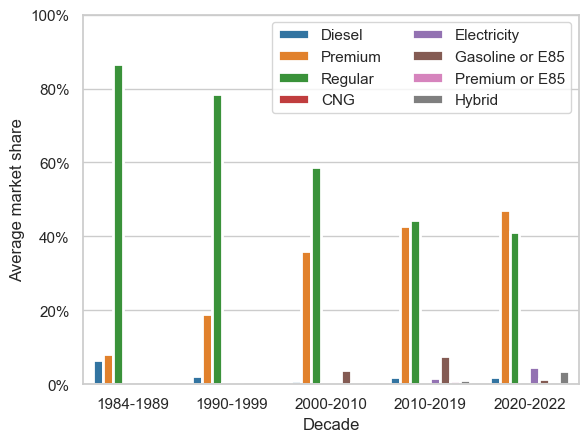

In [13]:
fig, ax = plt.subplots()
sns.barplot(data=norm_fuel_types, x='YearAgg', y='normalized', hue='fuelType', lw=2, ax=ax)

ax.legend(loc=1, ncol=2)

ax.set_ylabel('Average market share')
ax.set_xlabel('Decade')

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['1984-1989', '1990-1999', '2000-2010', '2010-2019', '2020-2022'])

ax.set_ylim(0, 1)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

plt.savefig('./plots/2023-09-08_fuel_type_year_normalized.png', dpi=150, bbox_inches='tight')
plt.show()

## Energy consumption

In [14]:
agg = 10
df['YearAgg'] = (df['Year'] // agg) * agg

In [15]:
df['fuelType'].value_counts()

Regular            27935
Premium            13238
Gasoline or E85     1371
Diesel              1232
Electricity          381
Hybrid               276
Premium or E85       127
CNG                   60
Name: fuelType, dtype: int64

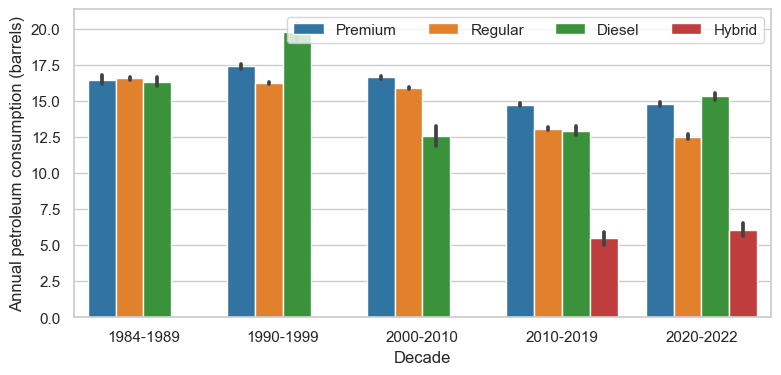

In [16]:
fig, ax = plt.subplots(figsize=(9, 4))
sns.barplot(data=df.query("fuelType in ('Premium', 'Regular', 'Diesel', 'Hybrid')"), x='YearAgg', y='barrels08', hue='fuelType')

ax.set_xlabel('Decade')

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['1984-1989', '1990-1999', '2000-2010', '2010-2019', '2020-2022'])

ax.set_ylabel('Annual petroleum consumption (barrels)')
ax.legend(loc=1, ncol=4)

plt.savefig('./plots/2023-09-08_fuel_barrels_decade.png', dpi=150, bbox_inches='tight')
plt.show()